In [17]:
# can directly run boxes 3 4 5 then  model train /model pred
# I guess my labelling was a bit scuffed so its not the best

**Installing dependancies**

In [123]:
#!pip install torch
#!pip install tensorboard

**Importing packages**

In [2]:
import torch
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import random
import glob
from math import ceil,floor
%matplotlib inline

In [3]:
# function to display image if needed

def imshow(path):
  image=cv2.imread(path)
  height , width=image.shape[:2]     #get dimensions
  image=cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC) #resize
  fig,ax=plt.subplots(figsize=(20,20))
  plt.axis("off")
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))     # change from cv2default BGR to RGB and plot
  plt.show()

**Downloading the Darknet C neural network Framework**

In [4]:
#!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5 

C:\Users\Prith\Desktop\lisence_plate\yolov5


In [5]:
#!pip install -r requirements.txt

     -------------------------------------- 948.0/948.0 KB 2.0 MB/s eta 0:00:00


**Renaming Images and Labels from garbage names to numbers**

In [17]:
def rename_images():
    path=r'C:\Users\Prith\Desktop\photos_temp\Train'
    count=1
    files=os.listdir(path)
    for i in range(0,len(files),2):
        old_image=os.path.join(path,files[i])         # Every file is the image the one after is the label as it is stored in sorted order
        old_label=os.path.join(path,files[i+1])

        new_image=os.path.join(path,f'{count}.jpg')    #renaming image and corresponding count as same number
        new_label=os.path.join(path,f'{count}.txt')

        os.rename(old_image,new_image)
        os.rename(old_label,new_label)

        count+=1
    return count
    
#count=rename_images()

In [20]:
print(f'Number of Samples= {count}')

Number of Samples= 357


In [23]:
os.listdir('../')

['.ipynb_checkpoints', 'dataset', 'mama.ipynb', 'Train', 'yolov5']

Creating separate files for image val,image train , label val, label train

In [109]:
train_ratio=0.85
val_ratio=0.15

image_train_path=r'C:\Users\Prith\Desktop\lisence_plate\dataset\images\train'
label_train_path=r'C:\Users\Prith\Desktop\lisence_plate\dataset\labels\train'
image_val_path=r'C:\Users\Prith\Desktop\lisence_plate\dataset\images\val'
label_val_path=r'C:\Users\Prith\Desktop\lisence_plate\dataset\labels\val'

src_path=r'C:\Users\Prith\Desktop\lisence_plate\Train'

images=[]
txts=[]


In [110]:
for file in os.listdir(src_path):
    if file.endswith('.jpg'):
        images.append(os.path.join(src_path,file))      # paths of all images
    else:
        txts.append(os.path.join(src_path,file))        # path of all labels

In [111]:
len(images)

356

In [112]:
len(txts)

356

In [113]:
train_len=ceil(len(images)*train_ratio)                                    #number of train and validation samples
val_len=floor(len(images)*val_ratio)
print(f"Train ={train_len} \nVal={val_len}\ntots={train_len+val_len}")

Train =303 
Val=53
tots=356


In [114]:
txts[0]

'C:\\Users\\Prith\\Desktop\\lisence_plate\\Train\\1.txt'

images[0]
temp=os.path.split(images[250])
temp[1].split('.')[0]

Splitting Images and Labels into **Training data**

In [116]:
for i in range(train_len):
    image_path=random.choice(images)
    tail=os.path.split(image_path)        # path of img
    image_name=tail[1]                        #name of img
    txt_name=image_name.split('.')[0]+ '.txt' # name of txt
    
    shutil.copy(os.path.join(src_path,image_name),os.path.join(image_train_path,image_name))    # copy image from src to dest
    shutil.copy(os.path.join(src_path,txt_name),os.path.join(label_train_path,txt_name))          #copy label from src to dest
    
    images.remove(image_path)                                        #remove from array so as to not choose it again
    txts.remove(os.path.join(src_path,txt_name))
    

Splitting Images and Labels into **Validation data**

In [117]:
for i in range(val_len):
    image_path=random.choice(images)
    tail=os.path.split(image_path)        # path of img
    image_name=tail[1]                        #name of img
    txt_name=image_name.split('.')[0]+ '.txt' # name of txt
    
    shutil.copy(os.path.join(src_path,image_name),os.path.join(image_val_path,image_name))
    shutil.copy(os.path.join(src_path,txt_name),os.path.join(label_val_path,txt_name))
    
    images.remove(image_path)
    txts.remove(os.path.join(src_path,txt_name))
    

In [5]:
os.getcwd()

'C:\\Users\\Prith\\Desktop\\lisence_plate\\yolov5'

Multiple oe files error fix--Not a good fix  (Might be just for my computer)

In [6]:
#NOT WORKING
#!conda config --append channels conda-forge
#!conda install nomkl
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

**Training the model**

In [9]:
# !python train.py --img 640 --batch 1 --epochs 3 --data dataset.yaml --weights yolov5s.pt -> I did this and it took like 2hrs for some reason
# run train.py image size, batch size, epochs, data confic, pretrained weights
# Can also give absolute path of all of them 
!python train.py --img 640 --batch 8 --epochs 90 --data dataset.yaml --weights yolov5s.pt  
#gpu is not working with pytorch for me so i stopped this one at 6 hrs 
# Can train with more epochs for higher accuracy

^C


**Visualizing metrics using TensorBoard**

In [8]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs

Reusing TensorBoard on port 6006 (pid 64396), started 1:08:16 ago. (Use '!kill 64396' to kill it.)

In [10]:
#running detect.py to produce results using the weights-best.pt which were obtained in last model
!python detect.py --source C:\Users\Prith\Downloads\test.jpg  --weights runs\train\exp2\weights\best.pt

detect: weights=['runs\\train\\exp2\\weights\\best.pt'], source=C:\Users\Prith\Downloads\test.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-20-gacc58c1 torch 1.10.2 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\Prith\Downloads\test.jpg: 352x640 3 lisence_plates, Done. (0.568s)
Speed: 5.0ms pre-process, 568.5ms inference, 7.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp


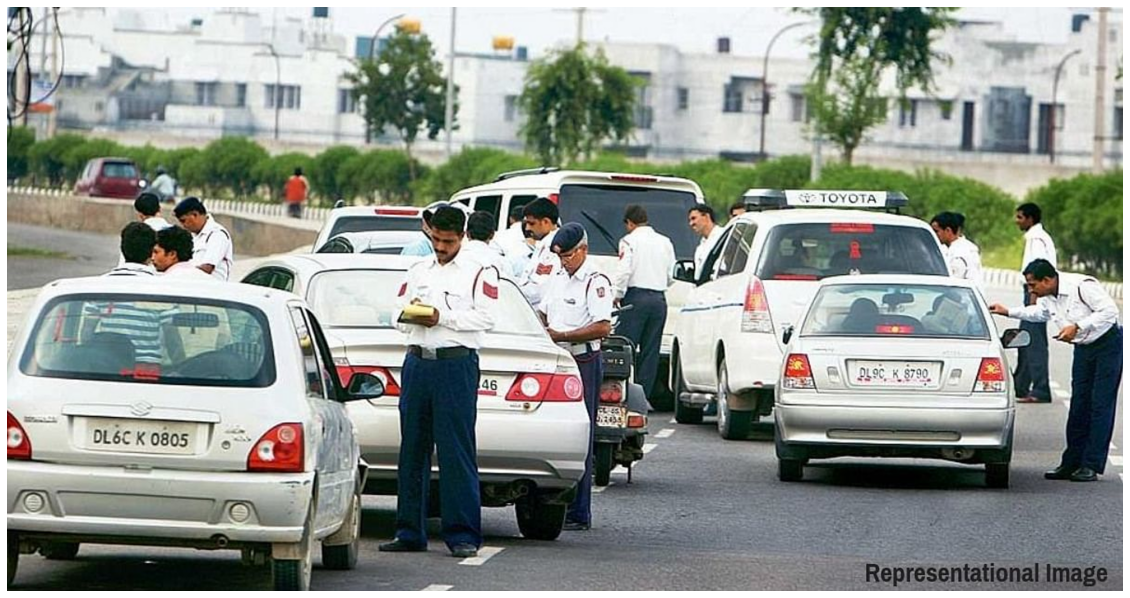

In [14]:
imshow(r'C:\Users\Prith\Downloads\test.jpg')

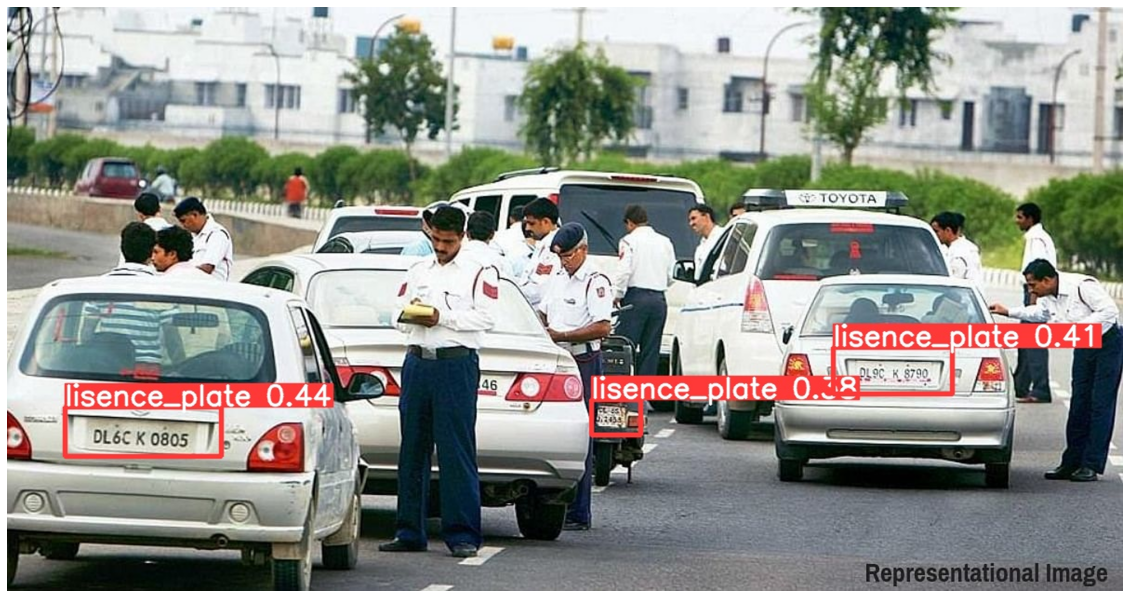

In [16]:
imshow(r'C:\Users\Prith\Desktop\lisence_plate\yolov5\runs\detect\exp\test.jpg')

In [29]:
# CHanging detect.py to save the lisence plates in a separate folder
!python detect.py --source C:\Users\Prith\Downloads\test.jpg  --weights runs\train\exp2\weights\best.pt 

detect: weights=['runs\\train\\exp2\\weights\\best.pt'], source=C:\Users\Prith\Downloads\test.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-21-g1957c45 torch 1.10.2 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\Prith\Downloads\test.jpg: 352x640 3 lisence_plates, Done. (0.113s)
Speed: 1.0ms pre-process, 112.7ms inference, 14.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp2


In [23]:
print(torch.cuda.is_available())

False
